# Stock Price Prediction using RNN and LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [3]:
train_set = pd.read_csv(r'C:\Users\user\Google_Stock_Price_Train.csv')
test_set = pd.read_csv(r'C:\Users\user\Google_Stock_Price_Test.csv')
print(train_set);
train_set=train_set.iloc[:,1:2].values
test_set=test_set.iloc[:,1:2].values


            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [4]:
#feature scaling (normalization)
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0,1),copy=True)
train_set=scaling.fit_transform(train_set)
test_set=scaling.fit_transform(test_set)
test_set

array([[0.        ],
       [0.16186441],
       [0.12322034],
       [0.27881356],
       [0.46762712],
       [0.49237288],
       [0.44389831],
       [0.48016949],
       [0.4859322 ],
       [0.47915254],
       [0.45762712],
       [0.4459322 ],
       [0.47627119],
       [0.4820339 ],
       [0.73711864],
       [0.86118644],
       [1.        ],
       [0.94745763],
       [0.60762712],
       [0.3059322 ]])

In [5]:
#defining input and output for training set
x_train=train_set[0:1257] #stock price at
y_train=train_set[1:1258] #stock price at t+1 time
x_test=test_set[0:19] #stock price at
y_test=test_set[1:20] #stock price at t+1 time
print(y_train)
print(x_train)


[[0.09701243]
 [0.09433366]
 [0.09156187]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]
[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95163331]
 [0.95725128]
 [0.93796041]]


In [6]:
x_train=np.reshape(x_train,(1257,1,1))
x_test=np.reshape(x_test,(19,1,1))
print(x_train)

[[[0.08581368]]

 [[0.09701243]]

 [[0.09433366]]

 ...

 [[0.95163331]]

 [[0.95725128]]

 [[0.93796041]]]


In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers


In [8]:
model=models.Sequential()
model.add(layers.LSTM(units=4,activation="sigmoid",input_shape=(None,1)))
model.add(layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [12]:
model.history=model.fit(x_train,y_train,epochs=200,batch_size=32)

Train on 1257 samples
Epoch 1/200
1257/1257 [==============================] - 1s 1ms/sample - loss: 2.6697e-04
Epoch 2/200
1257/1257 [==============================] - 0s 76us/sample - loss: 2.5961e-04
Epoch 3/200
1257/1257 [==============================] - 0s 75us/sample - loss: 2.5867e-04
Epoch 4/200
1257/1257 [==============================] - 0s 75us/sample - loss: 2.5851e-04
Epoch 5/200
1257/1257 [==============================] - 0s 82us/sample - loss: 2.5883e-04
Epoch 6/200
1257/1257 [==============================] - 0s 73us/sample - loss: 2.6251e-04
Epoch 7/200
1257/1257 [==============================] - 0s 73us/sample - loss: 2.5916e-04
Epoch 8/200
1257/1257 [==============================] - 0s 83us/sample - loss: 2.6035e-04
Epoch 9/200
1257/1257 [==============================] - 0s 82us/sample - loss: 2.5660e-04
Epoch 10/200
1257/1257 [==============================] - 0s 83us/sample - loss: 2.5998e-04
Epoch 11/200
1257/1257 [==============================] - 0s 81us/sa

In [13]:
model.evaluate(x_test,y_test) #like a validation set

19/19 [==============================] - 0s 10ms/sample - loss: 0.0209


0.020913682878017426

In [14]:
#prediction on test set
x_test=test_set[:] #prediction on all 20 data
x_test=np.reshape(x_test,(20,1,1))
y_pred=model.predict(x_test)


In [15]:
#inversing the scale of y_pred
y_pred=scaling.inverse_transform(y_pred)
y_pred

array([[779.1229 ],
       [788.232  ],
       [786.011  ],
       [795.0916 ],
       [806.4285 ],
       [807.92175],
       [804.9964 ],
       [807.1855 ],
       [807.5332 ],
       [807.1241 ],
       [805.82495],
       [805.11914],
       [806.9502 ],
       [807.298  ],
       [822.4889 ],
       [829.5673 ],
       [837.0944 ],
       [834.3005 ],
       [814.8474 ],
       [796.70575]], dtype=float32)

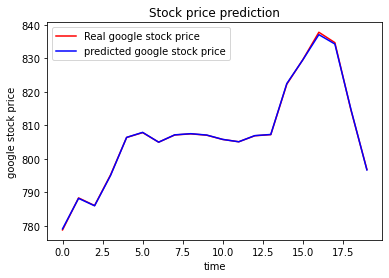

In [16]:
#plotting
real_price=scaling.inverse_transform(test_set)
plt.plot(real_price, color="red", label="Real google stock price")
plt.plot(y_pred, color="blue", label="predicted google stock price")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.title("Stock price prediction")
plt.legend()
plt.show()


In [17]:
#prediction on training set
real_stock=scaling.inverse_transform(train_set)
f_pred=train_set[:]
f_pred=np.reshape(f_pred,(1258,1,1))
predicted_stock=model.predict(f_pred)
predicted_stock=scaling.inverse_transform(predicted_stock)
print(real_stock.shape)
print(predicted_stock.shape)

(1258, 1)
(1258, 1)


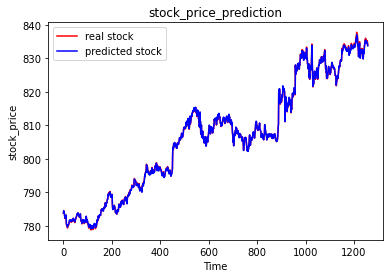

In [18]:
#plotting 
plt.plot(real_stock,color="red",label="real stock")
plt.plot(predicted_stock,color="blue",label="predicted stock")
plt.xlabel("Time")
plt.ylabel("stock_price")
plt.legend()
plt.title("stock_price_prediction")
plt.show()